___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___

# Natural Language Processing Project

Problem Statement
Sentiment analysis remains one of the key problems that has seen extensive application of natural language processing. This time around, given the tweets from customers about various tech firms who manufacture and sell mobiles, computers, laptops, etc, the task is to identify if the tweets have a negative sentiment towards such companies or products.

 

Evaluation Metric
The metric used for evaluating the performance of classification model would be weighted F1-Score.

## Imports
 **Import the usual suspects. :) **

In [2]:
import numpy as np
import pandas as pd

## The Data

**Read the train.csv and test.csv file **

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

** Check the head, info , and describe methods on yelp.**

In [4]:
train.head()

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7920 entries, 0 to 7919
Data columns (total 3 columns):
id       7920 non-null int64
label    7920 non-null int64
tweet    7920 non-null object
dtypes: int64(2), object(1)
memory usage: 185.7+ KB


In [6]:
train.describe()

,id,label
count,7920.000000,7920.000000
mean,3960.500000,0.255808
std,2286.451399,0.436342
min,1.000000,0.000000
25%,1980.750000,0.000000
50%,3960.500000,0.000000
75%,5940.250000,1.000000
max,7920.000000,1.000000


# EDA

Let's explore the data

## Imports

**Import the data visualization libraries if you haven't done so already.**

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

**Use FacetGrid from the seaborn library to create a grid of 5 histograms of text length based off of the star ratings. Reference the seaborn documentation for hints on this**

In [11]:
train['tweet_len'] = train['tweet'].apply(len)

In [12]:
train.head()

,id,label,tweet,tweet_len
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...,128
1,2,0,Finally a transparant silicon case ^^ Thanks t...,131
2,3,0,We love this! Would you go? #talk #makememorie...,123
3,4,0,I'm wired I know I'm George I was made that wa...,112
4,5,1,What amazing service! Apple won't even talk to...,124


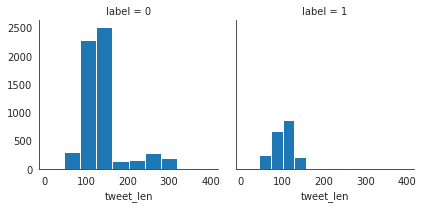

In [14]:
g = sns.FacetGrid(train,col='label')
g.map(plt.hist,'tweet_len')

**Create a boxplot of text length for each star category.**

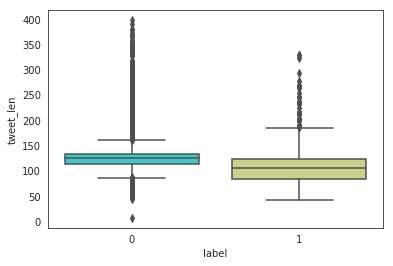

In [15]:
sns.boxplot(x='label',y='tweet_len',data=train,palette='rainbow')

**Create a countplot of the number of occurrences for each type of star rating.**

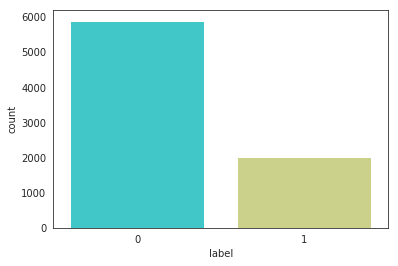

In [16]:
sns.countplot(x='label',data=train,palette='rainbow')

## NLP Classification Task

** Create two objects X and y. X will be the 'text' column of yelp_class and y will be the 'stars' column of yelp_class. (Your features and target/labels)**

In [22]:
X = train['tweet']
y = train['label']

## Text Preprocessing

In [23]:
def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    import string
    from nltk.corpus import stopwords
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [24]:
train.head()

,id,label,tweet,tweet_len
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...,128
1,2,0,Finally a transparant silicon case ^^ Thanks t...,131
2,3,0,We love this! Would you go? #talk #makememorie...,123
3,4,0,I'm wired I know I'm George I was made that wa...,112
4,5,1,What amazing service! Apple won't even talk to...,124


In [25]:
train['tweet'].head(5).apply(text_process)

0    [fingerprint, Pregnancy, Test, httpsgooglh1MfQ...
1    [Finally, transparant, silicon, case, Thanks, ...
2    [love, Would, go, talk, makememories, unplug, ...
3    [Im, wired, know, Im, George, made, way, iphon...
4    [amazing, service, Apple, wont, even, talk, qu...
Name: tweet, dtype: object

**Import CountVectorizer and create a CountVectorizer object.**

In [26]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

** Use the fit_transform method on the CountVectorizer object and pass in X (the 'text' column). Save this result by overwriting X.**

In [27]:
# Might take awhile...
bow_transformer = CountVectorizer(analyzer=text_process).fit(train['tweet'])

# Print total number of vocab words
print(len(bow_transformer.vocabulary_))

26765


In [28]:
tweet_bow = bow_transformer.transform(train['tweet'])

In [29]:
test_tweet_bow = bow_transformer.transform(test['tweet'])

In [30]:
print('Shape of Sparse Matrix: ', tweet_bow.shape)
print('Amount of Non-Zero occurences: ', tweet_bow.nnz)

Shape of Sparse Matrix:  (7920, 26765)
Amount of Non-Zero occurences:  96469


In [31]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer().fit(tweet_bow)

In [32]:
tweet_tfidf = tfidf_transformer.transform(tweet_bow)
print(tweet_tfidf.shape)

(7920, 26765)


In [33]:
test_tweet_tfidf = tfidf_transformer.transform(test_tweet_bow)

# Modeling

## Baseline - Naive Baye's

In [54]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB().fit(tweet_tfidf, train['label'])

In [55]:
sub = pd.read_csv('sample_submission.csv')

In [60]:
pred = classifier.predict(test_tweet_tfidf)

In [63]:
sub['label'] = pred

In [64]:
sub.head()

,id,label
0,7921,1
1,7922,1
2,7923,0
3,7924,1
4,7925,0


In [68]:
sub.to_csv('Submission2.csv',index=False)

## Random Forest

In [34]:
from sklearn.ensemble  import RandomForestClassifier

In [35]:
rf_classifier = RandomForestClassifier()

In [36]:
rf_classifier.fit(tweet_tfidf, train['label'])

/home/mkadam/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [39]:
pred = rf_classifier.predict(test_tweet_tfidf)

In [40]:
sub1 = pd.read_csv('sample_submission.csv')

In [42]:
sub1['label']=pred

In [51]:
sub1.to_csv('Submission3.csv',index=False)

## XGBoost Forest

In [52]:
from xgboost  import XGBClassifier

In [53]:
xgb_classifier = XGBClassifier()

In [54]:
xgb_classifier.fit(tweet_tfidf, train['label'])

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

In [56]:
pred = xgb_classifier.predict(test_tweet_tfidf)

In [57]:
sub4 = pd.read_csv('sample_submission.csv')

In [60]:
sub4['label'] = pred

In [62]:
sub4.to_csv('Submission4.csv',index=False)

## Train Test Split

Let's split our data into training and testing data.

** Use train_test_split to split up the data into X_train, X_test, y_train, y_test. Use test_size=0.3 and random_state=101 **

In [120]:
from sklearn.model_selection import train_test_split

In [121]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=101)

## Training a Model

Time to train a model!

** Import MultinomialNB and create an instance of the estimator and call is nb **

In [122]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

**Now fit nb using the training data.**

In [123]:
nb.fit(X_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

## Predictions and Evaluations

Time to see how our model did!

**Use the predict method off of nb to predict labels from X_test.**

In [124]:
predictions = nb.predict(X_test)

** Create a confusion matrix and classification report using these predictions and y_test **

In [82]:
from sklearn.metrics import confusion_matrix,classification_report

In [125]:
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[159  69]
 [ 22 976]]


             precision    recall  f1-score   support

          1       0.88      0.70      0.78       228
          5       0.93      0.98      0.96       998

avg / total       0.92      0.93      0.92      1226



**Great! Let's see what happens if we try to include TF-IDF to this process using a pipeline.**

# Using Text Processing

** Import TfidfTransformer from sklearn. **

In [155]:
from sklearn.feature_extraction.text import  TfidfTransformer

** Import Pipeline from sklearn. **

In [156]:
from sklearn.pipeline import Pipeline

** Now create a pipeline with the following steps:CountVectorizer(), TfidfTransformer(),MultinomialNB()**

In [157]:
pipeline = Pipeline([
    ('bow', CountVectorizer()),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

## Using the Pipeline

**Time to use the pipeline! Remember this pipeline has all your pre-process steps in it already, meaning we'll need to re-split the original data (Remember that we overwrote X as the CountVectorized version. What we need is just the text**

### Train Test Split

**Redo the train test split on the yelp_class object.**

In [158]:
X = yelp_class['text']
y = yelp_class['stars']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=101)

**Now fit the pipeline to the training data. Remember you can't use the same training data as last time because that data has already been vectorized. We need to pass in just the text and labels**

In [159]:
# May take some time
pipeline.fit(X_train,y_train)

Pipeline(steps=[('bow', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_...f=False, use_idf=True)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

### Predictions and Evaluation

** Now use the pipeline to predict from the X_test and create a classification report and confusion matrix. You should notice strange results.**

In [153]:
predictions = pipeline.predict(X_test)

In [154]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[  0 228]
 [  0 998]]
             precision    recall  f1-score   support

          1       0.00      0.00      0.00       228
          5       0.81      1.00      0.90       998

avg / total       0.66      0.81      0.73      1226



/Users/marci/anaconda/lib/python3.5/site-packages/sklearn/metrics/classification.py:1074: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Looks like Tf-Idf actually made things worse! That is it for this project. But there is still a lot more you can play with:

**Some other things to try....**
Try going back and playing around with the pipeline steps and seeing if creating a custom analyzer like we did in the lecture helps (note: it probably won't). Or recreate the pipeline with just the CountVectorizer() and NaiveBayes. Does changing the ML model at the end to another classifier help at all?

# Great Job!